/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


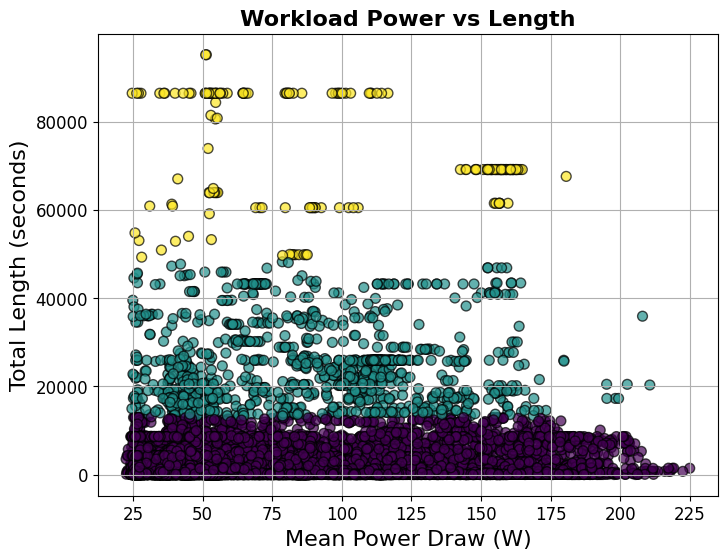

In [28]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

data = []
filenames = []
max_files = 20000

count = 0
for file_path in glob.glob(csv_dir):
    if count >= max_files:
        break
    df = pd.read_csv(file_path)
    # Extract the row where column_name = 'power_draw_W'
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    mean_power = power_row['mean'].values[0]
    total_length_seconds = power_row['total_length_seconds'].values[0]
    
    data.append([mean_power, total_length_seconds])
    filenames.append(file_path)
    count += 1

data = np.array(data)

# If no data was found, just exit gracefully
if len(data) == 0:
    print("No data found to cluster.")
    exit()

# Apply K-Means clustering on the 2D data (mean_power, total_length_seconds)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# Print out cluster assignments
#print("File | Mean Power (W) | Total Length (s) | Cluster")
#for fname, (mean_val, length_val), label in zip(filenames, data, labels):
#    print(f"{fname} | {mean_val:.2f} W | {length_val:.2f} s | Cluster {label}")

# Plot the results in 2D
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black', label='Workloads')

# Plot cluster centers
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster centers')

plt.xlabel('Mean Power Draw (W)', fontsize=16)
plt.ylabel('Total Length (seconds)', fontsize=16)
plt.title('Workload Power vs Length',  fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.legend()
plt.grid(True)
#plt.tight_layout()

output_image_path = os.path.join("k-means.png")
plt.savefig(output_image_path, dpi=300)  # You can adjust dpi as needed

plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


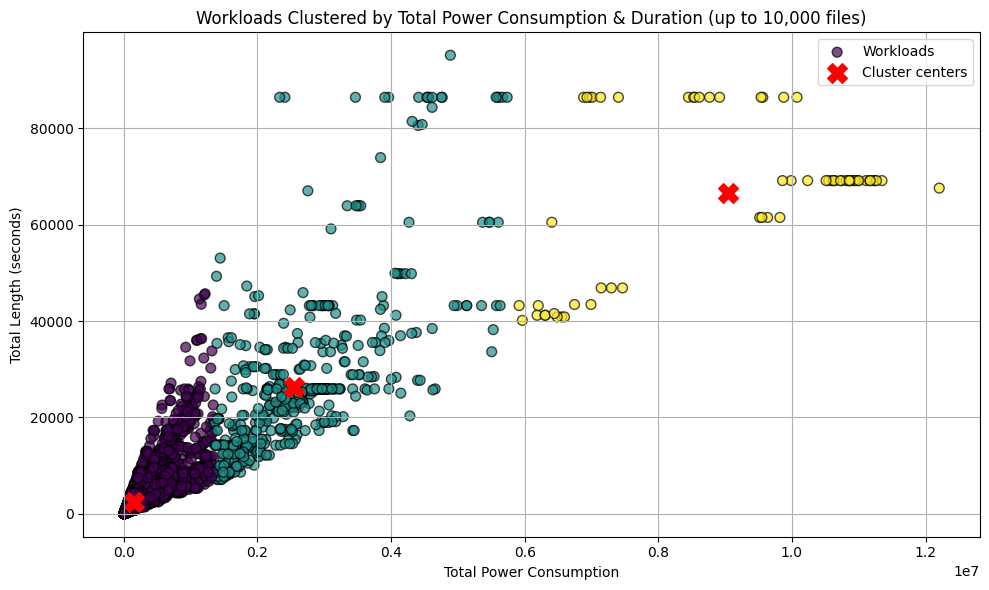

In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

data = []
filenames = []
max_files = 10000

count = 0
for file_path in glob.glob(csv_dir):
    if count >= max_files:
        break
    df = pd.read_csv(file_path)
    # Extract the row where column_name = 'power_draw_W'
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    total_power_consumption = power_row['total_power_consumption'].values[0]
    total_length_seconds = power_row['total_length_seconds'].values[0]
    
    data.append([total_power_consumption, total_length_seconds])
    filenames.append(file_path)
    count += 1

data = np.array(data)

# If no data was found, exit gracefully
if len(data) == 0:
    print("No data found to cluster.")
    exit()

# Apply K-Means clustering on the 2D data (total_power_consumption, total_length_seconds)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# Print out cluster assignments
#print("File | Total Power Consumption | Total Length (s) | Cluster")
#for fname, (power_val, length_val), label in zip(filenames, data, labels):
#    print(f"{fname} | {power_val:.2f} | {length_val:.2f} s | Cluster {label}")

# Plot the results in 2D
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black', label='Workloads')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster centers')

plt.xlabel('Total Power Consumption')
plt.ylabel('Total Length (seconds)')
plt.title('Workloads Clustered by Total Power Consumption & Duration (up to 10,000 files)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


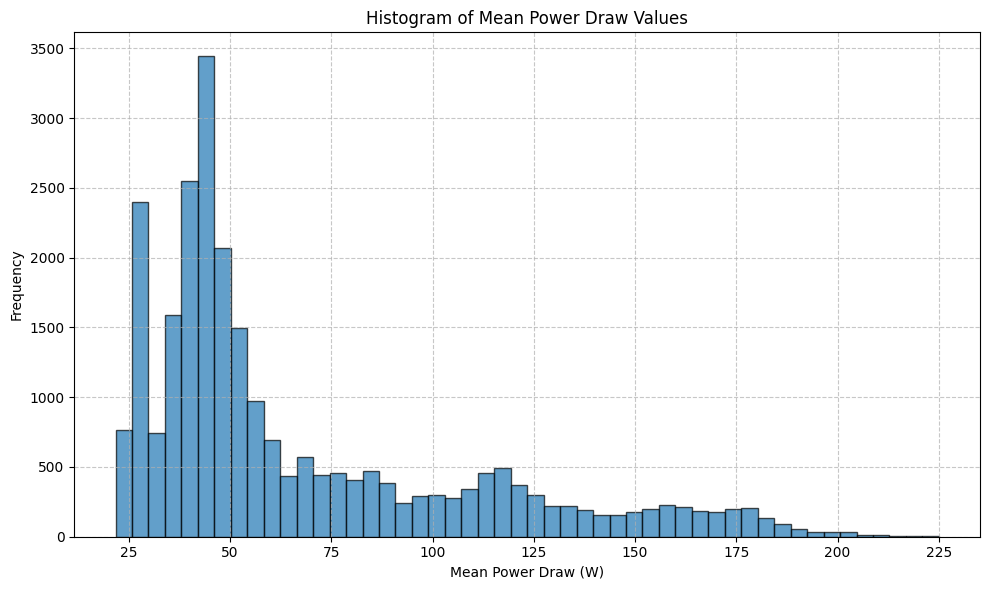

In [12]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

mean_values = []

for file_path in glob.glob(csv_dir):
    df = pd.read_csv(file_path)
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    mean_power = power_row['mean'].values[0]
    mean_values.append(mean_power)

# Convert to a Pandas Series or NumPy array if desired
# mean_values = np.array(mean_values)

# Plot the histogram
plt.figure(figsize=(10,6))

output_image_path = os.path.join("power-hist.png")
plt.savefig(output_image_path, dpi=300)  # You can adjust dpi as needed

plt.hist(mean_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Power Draw (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Power Draw Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


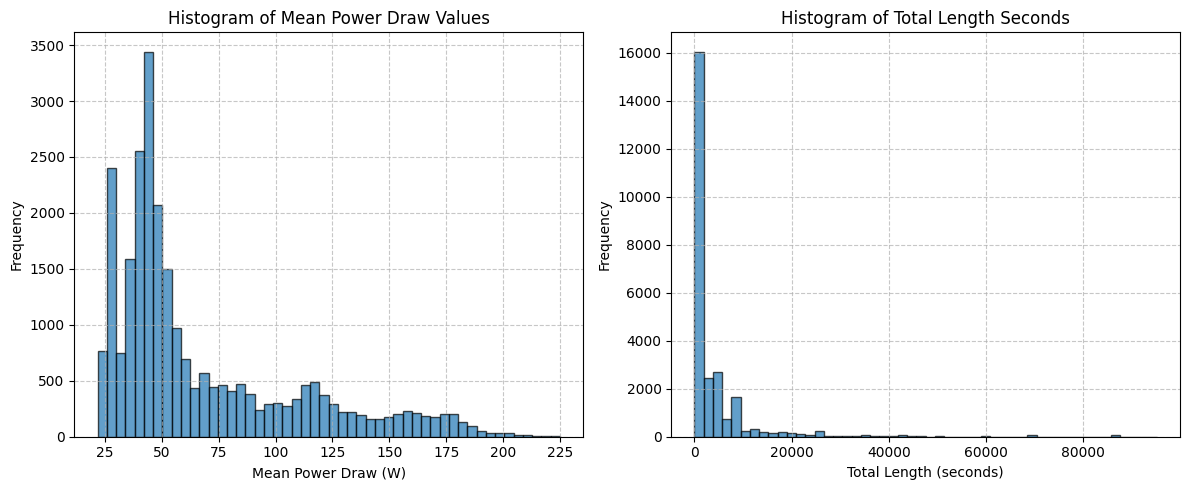

In [4]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

mean_values = []
length_values = []

for file_path in glob.glob(csv_dir):
    df = pd.read_csv(file_path)
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    mean_power = power_row['mean'].values[0]
    total_length = power_row['total_length_seconds'].values[0]
    
    mean_values.append(mean_power)
    length_values.append(total_length)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Mean Power Draw
axes[0].hist(mean_values, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Mean Power Draw (W)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Mean Power Draw Values')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Histogram for Total Length Seconds
axes[1].hist(length_values, bins=50, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Total Length (seconds)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Total Length Seconds')
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [21]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

mean_values = []
length_values = []

for file_path in glob.glob(csv_dir):
    df = pd.read_csv(file_path)
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    mean_power = power_row['mean'].values[0]
    total_length = power_row['total_length_seconds'].values[0]
    
    mean_values.append(mean_power)
    length_values.append(total_length)

# Histogram for Mean Power Draw
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(mean_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Power Draw (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Power Draw Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("mean_power_draw_histogram.png")
plt.close()

# Histogram for Total Length Seconds
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(length_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Total Length (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Length Seconds')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("total_length_histogram.png")
plt.close()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


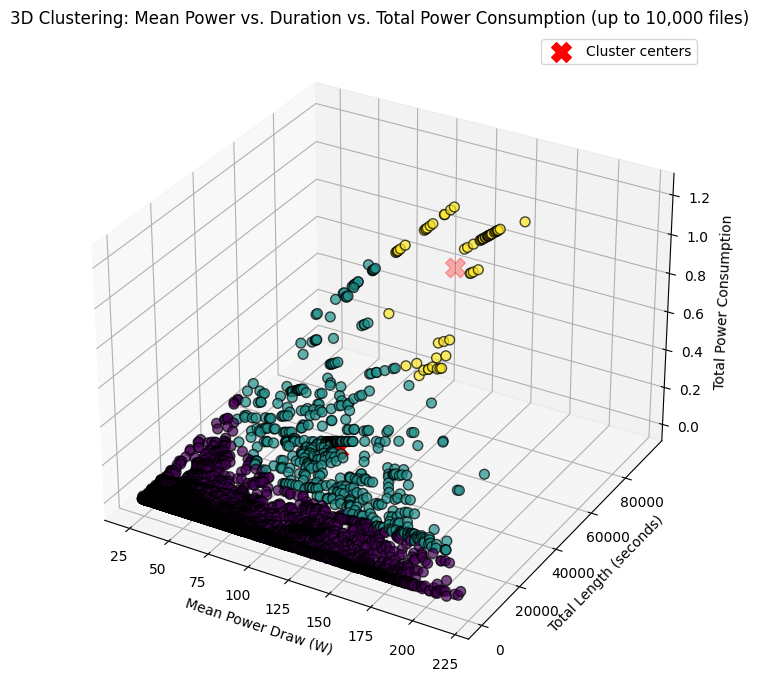

In [7]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

data = []
filenames = []
max_files = 10000

count = 0
for file_path in glob.glob(csv_dir):
    if count >= max_files:
        break
    df = pd.read_csv(file_path)
    # Extract the row where column_name = 'power_draw_W'
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue

    mean_power = power_row['mean'].values[0]
    total_power_consumption = power_row['total_power_consumption'].values[0]
    total_length_seconds = power_row['total_length_seconds'].values[0]

    # Append the three features: mean_power, total_length_seconds, total_power_consumption
    data.append([mean_power, total_length_seconds, total_power_consumption])
    filenames.append(file_path)
    count += 1

data = np.array(data)

# If no data was found, exit gracefully
if len(data) == 0:
    print("No data found to cluster.")
    exit()

# Apply K-Means clustering on the 3D data (mean_power, total_length_seconds, total_power_consumption)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points, color-coded by cluster
scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')

# Plot cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Cluster centers')

ax.set_xlabel('Mean Power Draw (W)')
ax.set_ylabel('Total Length (seconds)')
ax.set_zlabel('Total Power Consumption')
ax.set_title('3D Clustering: Mean Power vs. Duration vs. Total Power Consumption (up to 10,000 files)')
ax.legend()
ax.grid(True)

#ax.view_init(elev=30, azim=180)
plt.tight_layout()
plt.show()


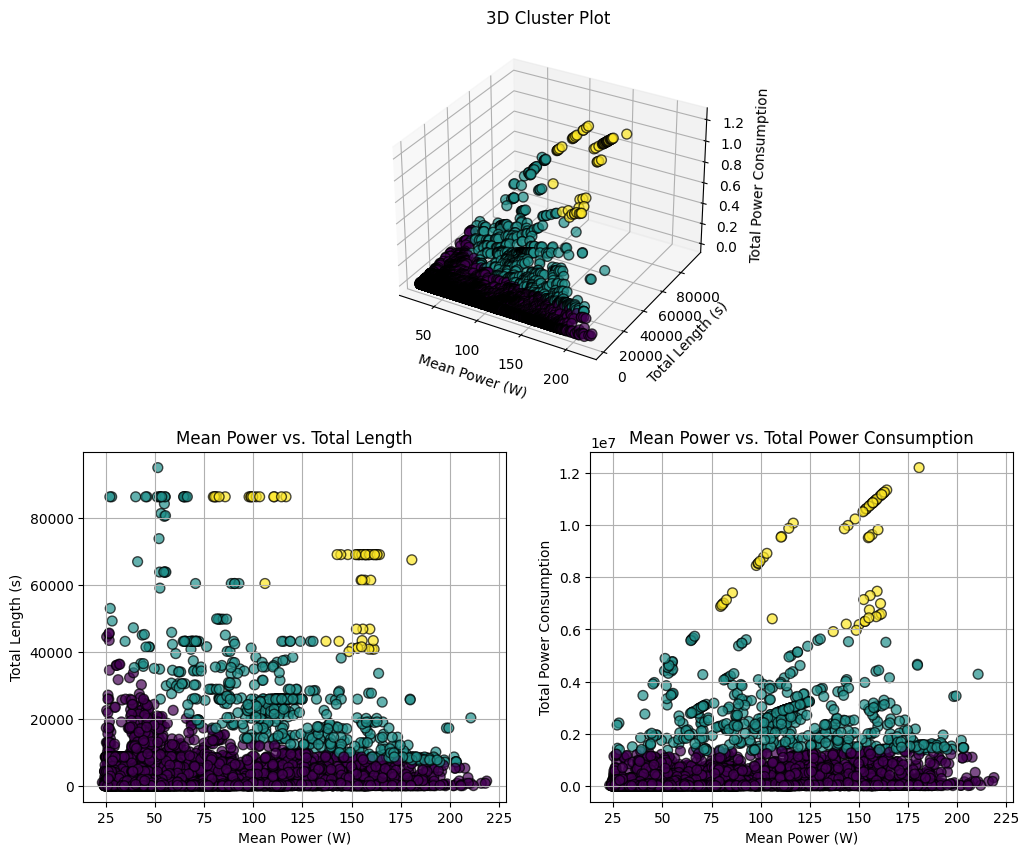

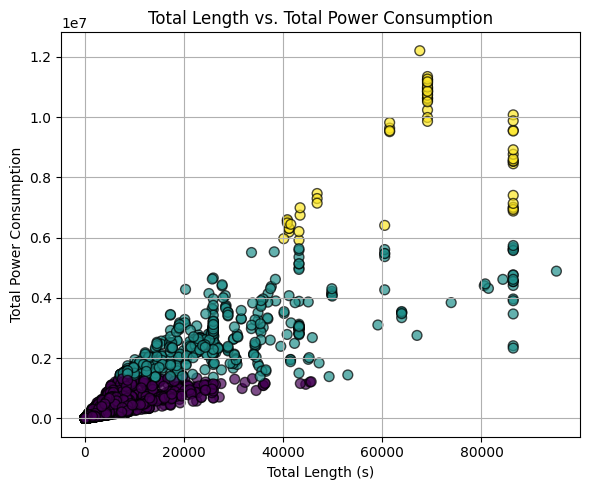

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assume data is a numpy array of shape (n_samples, 3): [mean_power, total_length_seconds, total_power_consumption]
# and labels is the cluster assignment for each point.

mean_power = data[:, 0]
total_length = data[:, 1]
total_power = data[:, 2]

fig = plt.figure(figsize=(12, 10))

# Create a 3x2 grid of subplots (or another layout that suits you)
# Top row: 3D plot spanning two columns
ax3d = fig.add_subplot(2, 2, (1,2), projection='3d')
sc = ax3d.scatter(mean_power, total_length, total_power, c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
ax3d.set_xlabel('Mean Power (W)')
ax3d.set_ylabel('Total Length (s)')
ax3d.set_zlabel('Total Power Consumption')
ax3d.set_title('3D Cluster Plot')
ax3d.grid(True)

# 2D Plot 1: Mean Power vs Total Length
ax1 = fig.add_subplot(2, 2, 3)
ax1.scatter(mean_power, total_length, c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
ax1.set_xlabel('Mean Power (W)')
ax1.set_ylabel('Total Length (s)')
ax1.set_title('Mean Power vs. Total Length')
ax1.grid(True)

# 2D Plot 2: Mean Power vs Total Power Consumption
ax2 = fig.add_subplot(2, 2, 4)
ax2.scatter(mean_power, total_power, c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
ax2.set_xlabel('Mean Power (W)')
ax2.set_ylabel('Total Power Consumption')
ax2.set_title('Mean Power vs. Total Power Consumption')
ax2.grid(True)

# If you want the third 2D plot (Total Length vs Total Power Consumption),
# you can either rearrange the figure layout or add another figure.
# For example, create another figure just for the third 2D plot:

fig2 = plt.figure(figsize=(6, 5))
ax3 = fig2.add_subplot(111)
ax3.scatter(total_length, total_power, c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
ax3.set_xlabel('Total Length (s)')
ax3.set_ylabel('Total Power Consumption')
ax3.set_title('Total Length vs. Total Power Consumption')
ax3.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


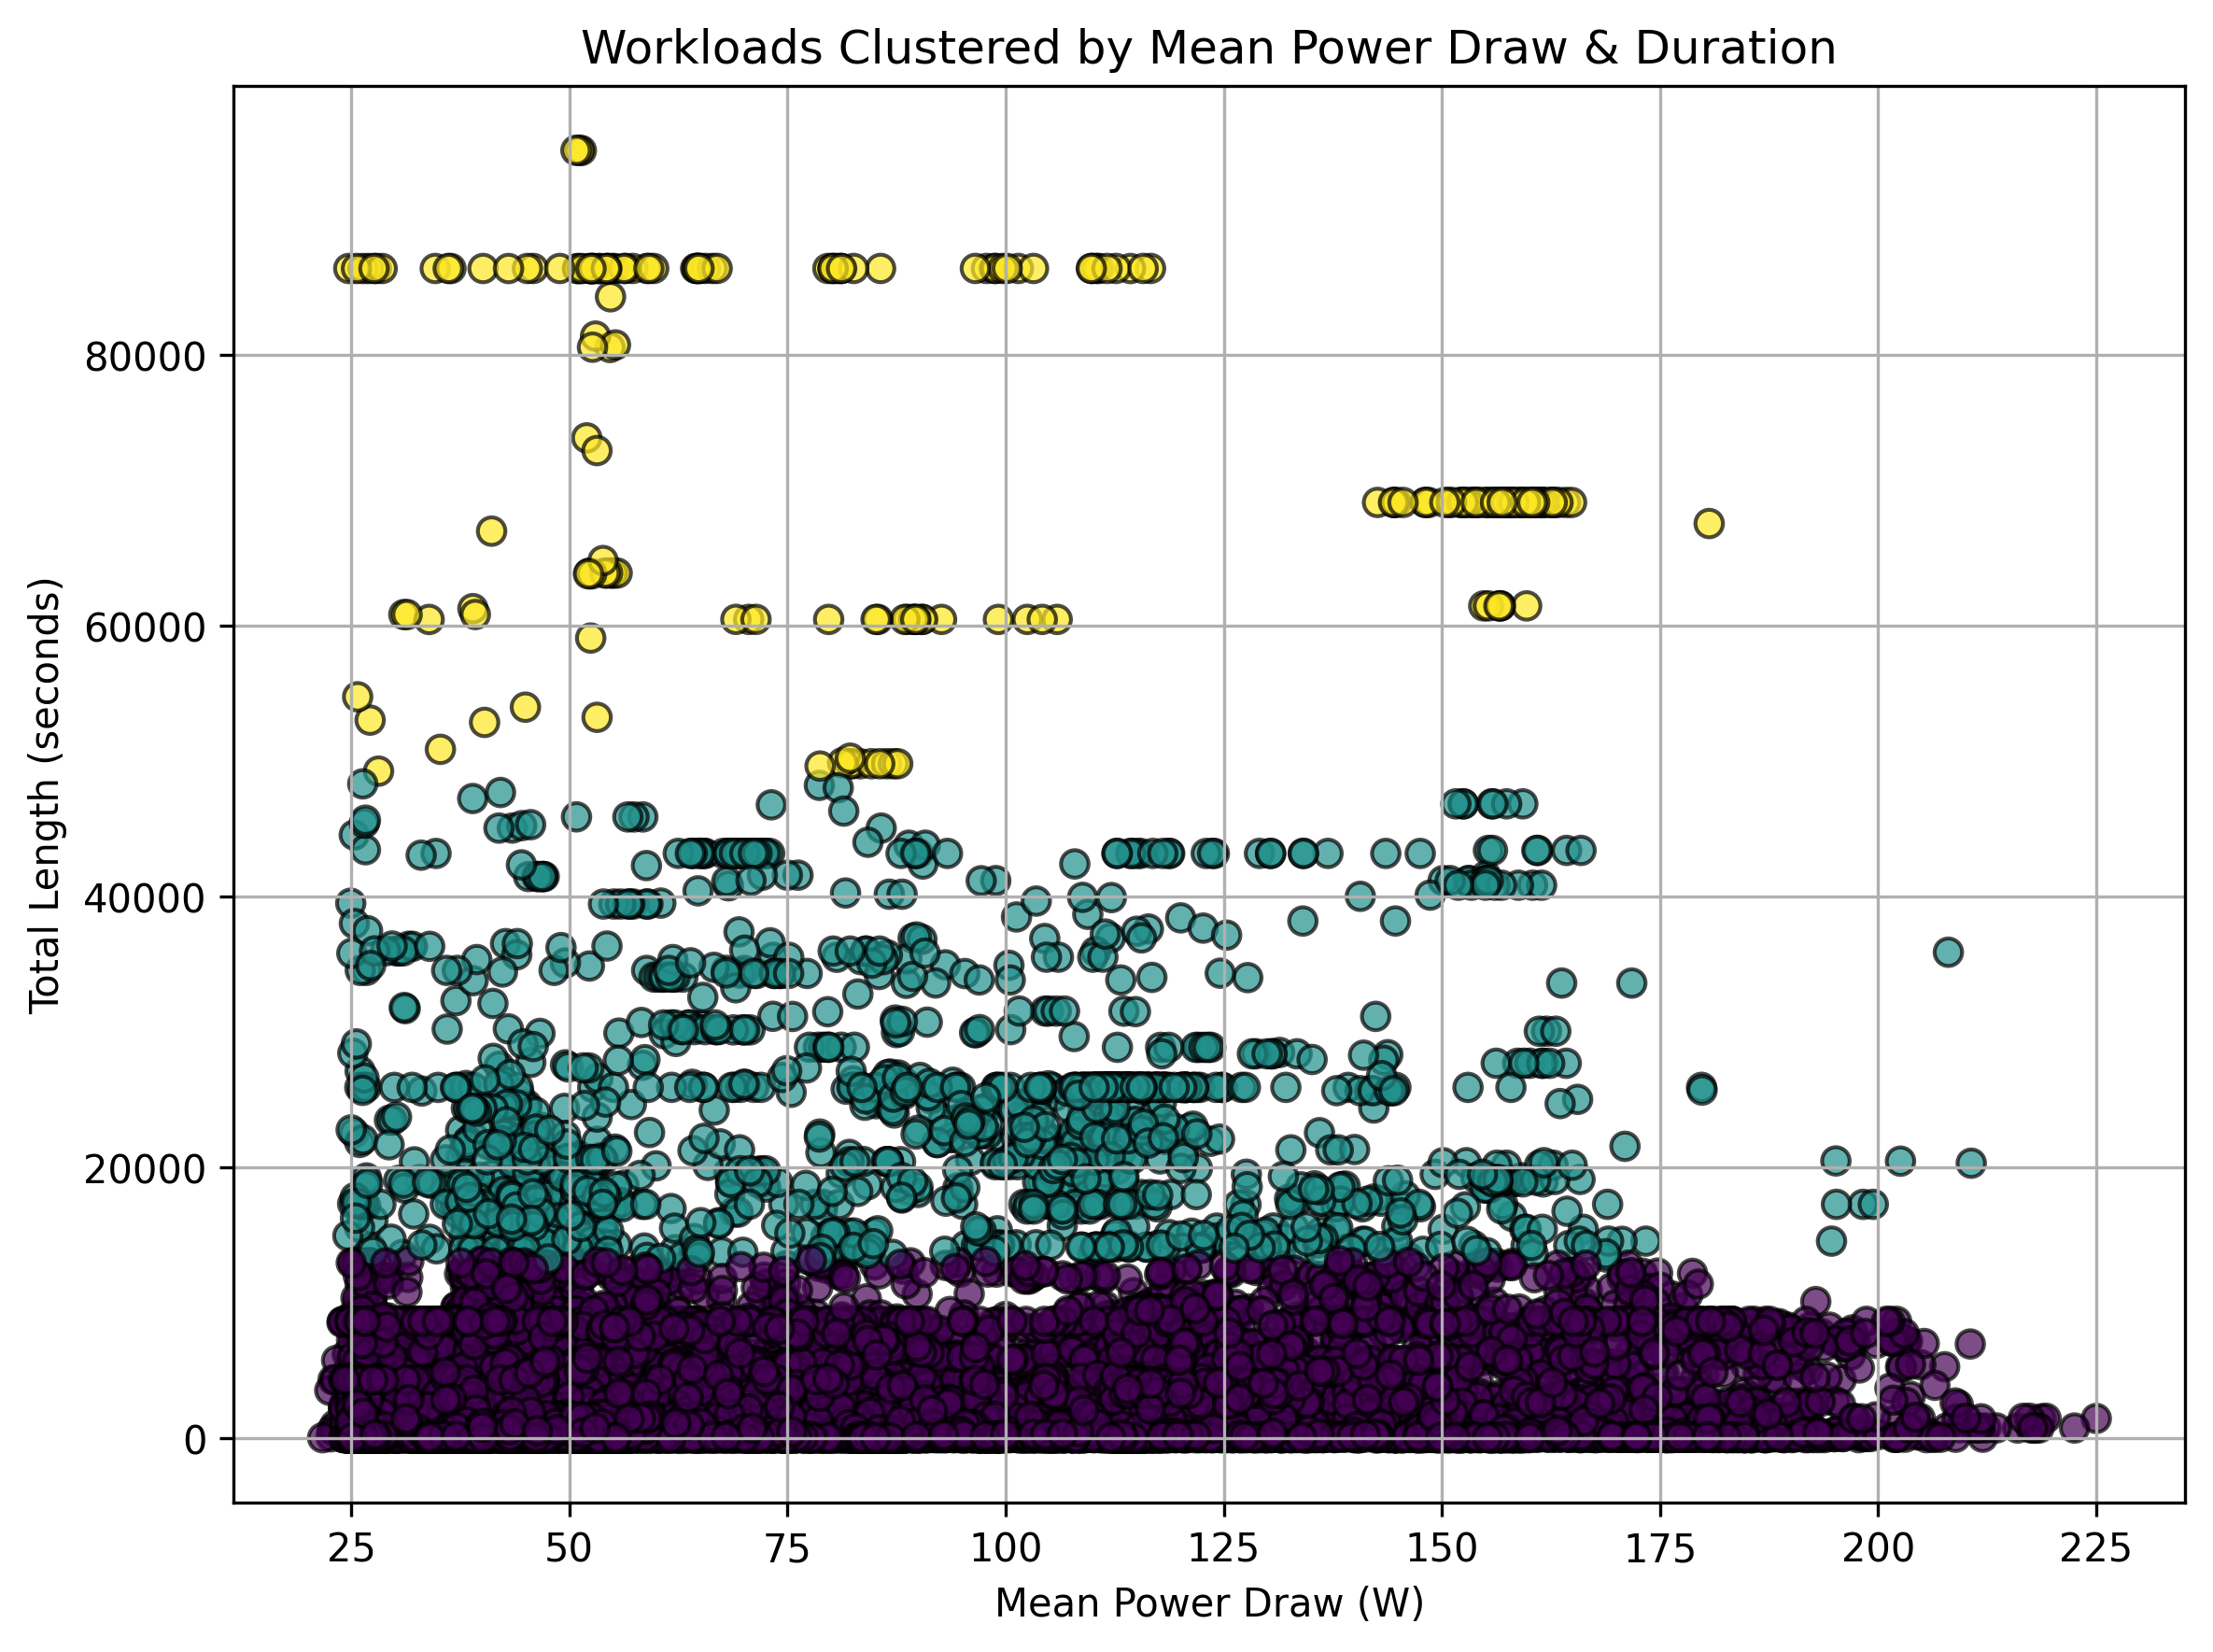

In [25]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os

# Directory containing your CSV files
csv_dir = "../filtered_workloads_1s_stats/*_stats.csv"

mean_values = []
length_values = []
data = []
filenames = []

for file_path in glob.glob(csv_dir):
    df = pd.read_csv(file_path)
    power_row = df.loc[df['column_name'] == 'power_draw_W']
    if power_row.empty:
        continue
    
    mean_power = power_row['mean'].values[0]
    total_length = power_row['total_length_seconds'].values[0]
    
    mean_values.append(mean_power)
    length_values.append(total_length)
    data.append([mean_power, total_length])
    filenames.append(file_path)

# Convert data to numpy array for clustering
data = np.array(data)

# If no data was found, exit gracefully
if len(data) == 0:
    print("No data found to cluster.")
    exit()

# Apply K-Means clustering on the 2D data (mean_power, total_length_seconds)
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(data)
centers = kmeans.cluster_centers_

# Histogram for Mean Power Draw
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(mean_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Mean Power Draw (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Power Draw Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("mean_power_draw_histogram3.png")
plt.close()

# Histogram for Total Length Seconds
plt.figure(figsize=(8, 6), dpi=300)
plt.hist(length_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Total Length (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Length Seconds')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("total_length_histogram3.png")
plt.close()

# Scatter plot for clustering results
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black', label='Workloads')
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster centers')
plt.xlabel('Mean Power Draw (W)')
plt.ylabel('Total Length (seconds)')
plt.title('Workloads Clustered by Mean Power Draw & Duration')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("workloads_clustering3.png", dpi=300)
plt.show()
